Dataset loaded successfully with shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSuppo

/tmp/ipython-input-2683152162.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


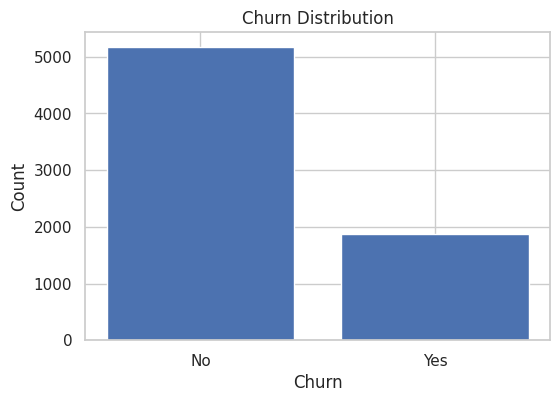

➡ Most customers did not churn. The dataset is imbalanced, meaning churned customers are fewer.



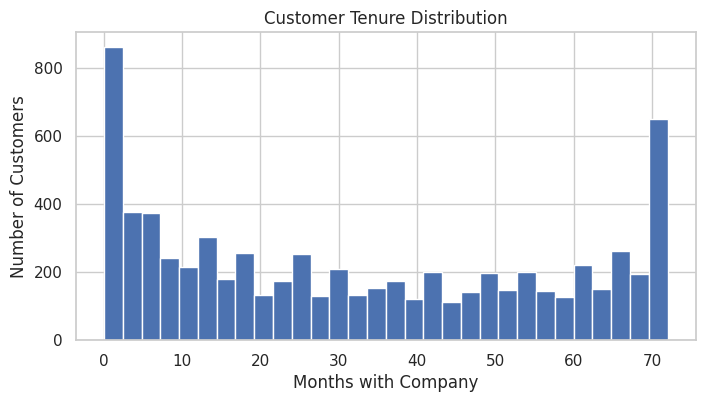

➡ Many customers are recent sign-ups (low tenure). Shorter tenures often correlate with higher churn.



/tmp/ipython-input-2683152162.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


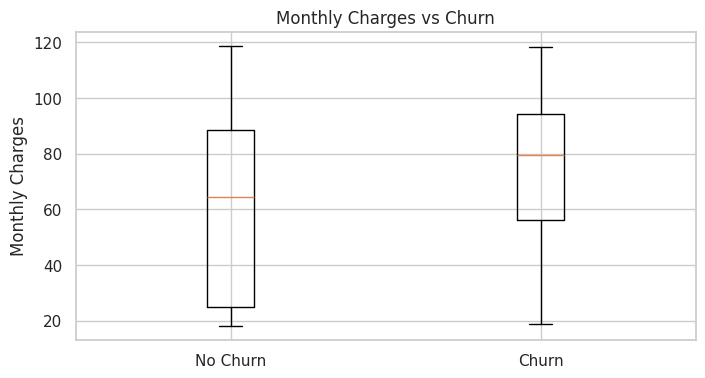

➡ Customers paying higher monthly charges tend to churn slightly more.



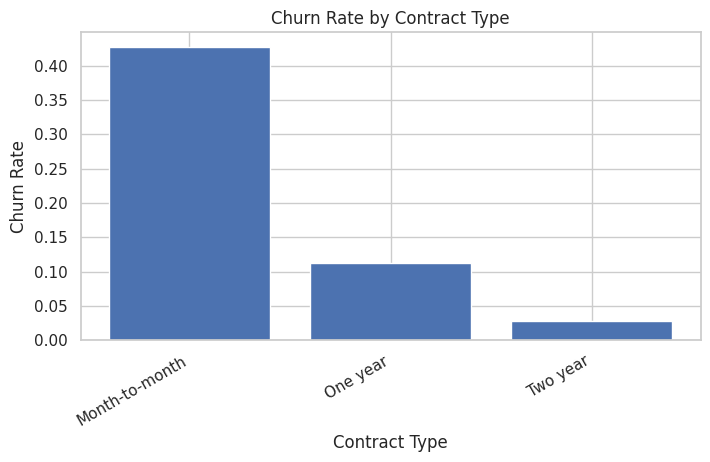

➡ Month-to-month customers churn the most. Annual contracts help reduce churn.



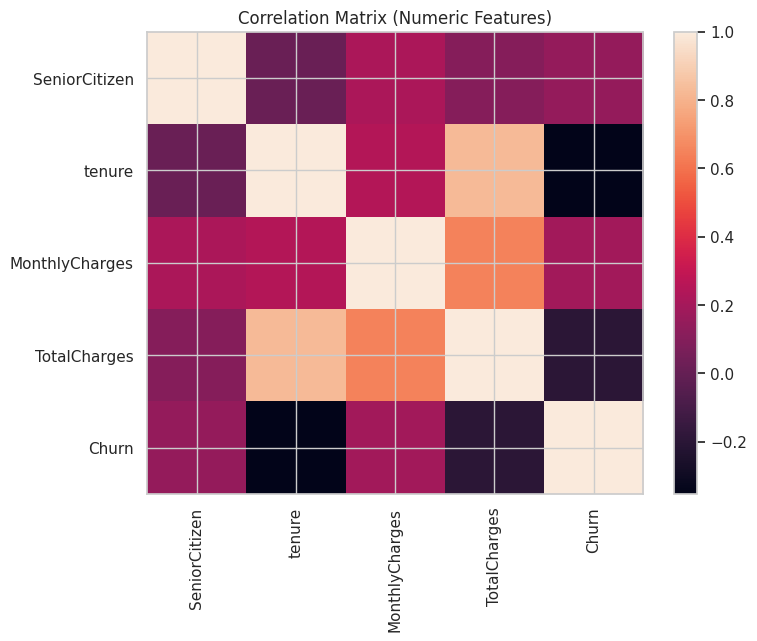

➡ Tenure, TotalCharges, and MonthlyCharges are correlated; they all relate to churn likelihood.

Training Logistic Regression...
Training Random Forest...

=== Logistic Regression Evaluation ===
Accuracy: 0.8055 → The percentage of all predictions that were correct.
Precision: 0.6572 → When the model predicts churn, how often it’s right.
Recall: 0.5588 → Out of all actual churners, how many the model correctly found.
F1-score: 0.6040 → The balance between precision and recall (good for imbalanced data).
ROC-AUC: 0.8421 → How well the model distinguishes churners from non-churners.

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.8488    0.8947    0.8711      1035
           1     0.6572    0.5588    0.6040       374

    accuracy                         0.8055      1409
   macro avg     0.7530    0.7268    0.7376      1409
weighted avg     0.7979    0.8055    0.8002      1409



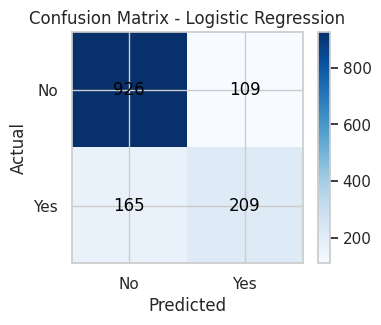

➡ Interpretation:
- True Positives (bottom-right): Correctly identified churners.
- True Negatives (top-left): Correctly identified loyal customers.
- False Positives: Predicted churn but customer stayed.
- False Negatives: Missed churners — important to minimize these.


=== Random Forest Evaluation ===
Accuracy: 0.7835 → The percentage of all predictions that were correct.
Precision: 0.6186 → When the model predicts churn, how often it’s right.
Recall: 0.4813 → Out of all actual churners, how many the model correctly found.
F1-score: 0.5414 → The balance between precision and recall (good for imbalanced data).
ROC-AUC: 0.8206 → How well the model distinguishes churners from non-churners.

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.8265    0.8928    0.8583      1035
           1     0.6186    0.4813    0.5414       374

    accuracy                         0.7835      1409
   macro avg     0.7225    0.6870    0.6998      1

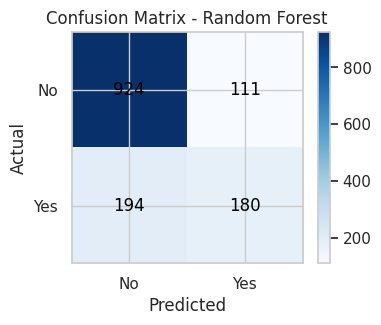

➡ Interpretation:
- True Positives (bottom-right): Correctly identified churners.
- True Negatives (top-left): Correctly identified loyal customers.
- False Positives: Predicted churn but customer stayed.
- False Negatives: Missed churners — important to minimize these.

📊 Model Comparison:
             accuracy  precision    recall        f1   roc_auc
LogReg      0.805536   0.657233  0.558824  0.604046  0.842135
RandForest  0.783534   0.618557  0.481283  0.541353  0.820602 

➡ Logistic Regression is more interpretable, while Random Forest usually captures complex relationships better.



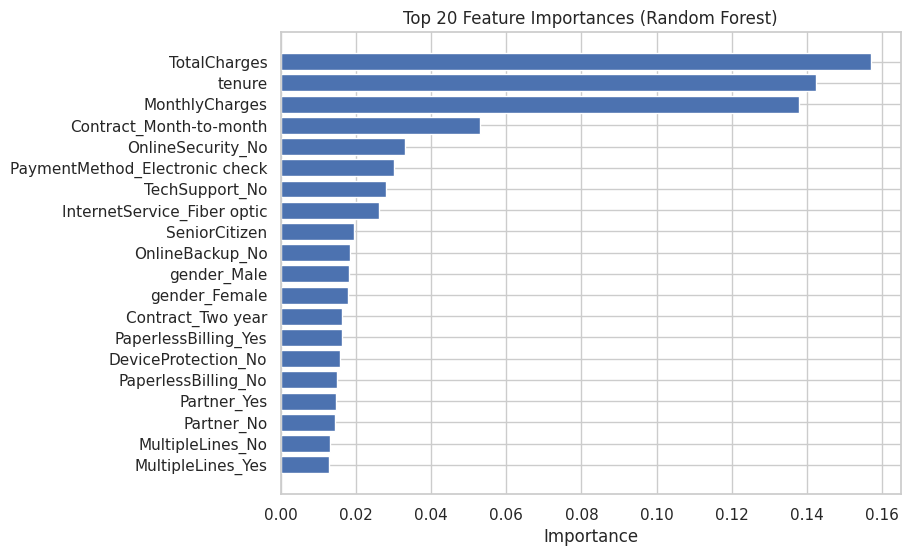

➡ These are the features that most influence churn. For example, tenure and contract type usually top the list — key targets for customer retention.

✅ Best model saved as LogisticRegression_churn_model.pkl in /models folder.


In [7]:
# -----------------------------
# Telco Customer Churn Prediction 2025
# Full EDA + ML with Detailed Explanations
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import joblib
import os

# -----------------------------
# Load Dataset
# -----------------------------
file_path = "data/telco_churn.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully with shape:", df.shape)
print(df.head(), "\n")

# -----------------------------
# Data Cleaning
# -----------------------------
df.columns = [c.strip() for c in df.columns]
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

if 'tenure' in df.columns:
    df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce').fillna(0).astype(int)

print("✅ Data cleaned successfully.\n")

# -----------------------------
# EDA (Exploratory Data Analysis)
# -----------------------------
plt.figure(figsize=(6,4))
counts = df['Churn'].value_counts().sort_index()
plt.bar(['No', 'Yes'], counts.values)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()
print("➡ Most customers did not churn. The dataset is imbalanced, meaning churned customers are fewer.\n")

plt.figure(figsize=(8,4))
plt.hist(df['tenure'], bins=30)
plt.title('Customer Tenure Distribution')
plt.xlabel('Months with Company')
plt.ylabel('Number of Customers')
plt.show()
print("➡ Many customers are recent sign-ups (low tenure). Shorter tenures often correlate with higher churn.\n")

plt.figure(figsize=(8,4))
plt.boxplot(
    [df[df['Churn']==0]['MonthlyCharges'], df[df['Churn']==1]['MonthlyCharges']],
    labels=['No Churn', 'Churn']
)
plt.title('Monthly Charges vs Churn')
plt.ylabel('Monthly Charges')
plt.show()
print("➡ Customers paying higher monthly charges tend to churn slightly more.\n")

contract_churn = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(contract_churn.index, contract_churn.values)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=30, ha='right')
plt.show()
print("➡ Month-to-month customers churn the most. Annual contracts help reduce churn.\n")

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'customerID' in numeric_cols:
    numeric_cols.remove('customerID')
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.title('Correlation Matrix (Numeric Features)')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()
print("➡ Tenure, TotalCharges, and MonthlyCharges are correlated; they all relate to churn likelihood.\n")

# -----------------------------
# Model Preparation
# -----------------------------
df_model = df.drop(columns=['customerID'], errors='ignore')
X = df_model.drop(columns=['Churn'])
y = df_model['Churn']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# Train Models
# -----------------------------
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

print("Training Logistic Regression...")
pipe_lr.fit(X_train, y_train)
print("Training Random Forest...")
pipe_rf.fit(X_train, y_train)

# -----------------------------
# Evaluation Function (with explanations)
# -----------------------------
def evaluate(pipe, X_test, y_test, model_name):
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy: {acc:.4f} → The percentage of all predictions that were correct.")
    print(f"Precision: {prec:.4f} → When the model predicts churn, how often it’s right.")
    print(f"Recall: {rec:.4f} → Out of all actual churners, how many the model correctly found.")
    print(f"F1-score: {f1:.4f} → The balance between precision and recall (good for imbalanced data).")
    print(f"ROC-AUC: {roc:.4f} → How well the model distinguishes churners from non-churners.")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    plt.imshow(cm, cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.colorbar()
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.xticks([0,1], ['No','Yes'])
    plt.yticks([0,1], ['No','Yes'])
    plt.show()

    print("➡ Interpretation:")
    print("- True Positives (bottom-right): Correctly identified churners.")
    print("- True Negatives (top-left): Correctly identified loyal customers.")
    print("- False Positives: Predicted churn but customer stayed.")
    print("- False Negatives: Missed churners — important to minimize these.\n")

    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc}

# -----------------------------
# Evaluate Models
# -----------------------------
res_lr = evaluate(pipe_lr, X_test, y_test, "Logistic Regression")
res_rf = evaluate(pipe_rf, X_test, y_test, "Random Forest")

results = pd.DataFrame([res_lr, res_rf], index=['LogReg', 'RandForest'])
print("📊 Model Comparison:\n", results, "\n")

print("➡ Logistic Regression is more interpretable, while Random Forest usually captures complex relationships better.\n")

# -----------------------------
# Feature Importance
# -----------------------------
ohe = pipe_rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_ohe_names = ohe.get_feature_names_out(categorical_features)
feature_names = numeric_features + list(cat_ohe_names)
importances = pipe_rf.named_steps['clf'].feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
plt.barh(feat_imp.index[::-1], feat_imp.values[::-1])
plt.title('Top 20 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

print("➡ These are the features that most influence churn. For example, tenure and contract type usually top the list — key targets for customer retention.\n")

# -----------------------------
# Save Best Model
# -----------------------------
best = 'RandomForest' if res_rf['f1'] > res_lr['f1'] else 'LogisticRegression'
os.makedirs('models', exist_ok=True)
joblib.dump(pipe_rf if best == 'RandomForest' else pipe_lr, f'models/{best}_churn_model.pkl')
print(f"✅ Best model saved as {best}_churn_model.pkl in /models folder.")
